In [32]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import seaborn as sns

<a id="0"></a> <br>
 # Table of Contents  
1. [EDA](#1)     
    1. [Variable Describtions](#7) 

Inspiration:

* Where are mortgages most likely to be approved?
* Can you predict mortgage decisions based on the criteria provided here?

In [2]:
dat = pd.read_csv("../Data/ny_hmda_2015.csv")

In [3]:
dat = pd.DataFrame(dat)
#dat 

| Varaible| Describtions|
| --- | --- | 
| action_taken_name | name of action taken | 
| agency_abbr | abbriation of agency name | 
| applicant_ethnicity_name | ethnicity of applicant |
| applicant_income_000s | applicant incomes | 
| applicant_race_name_1 | apllicant race |
| applicant_sex_name | applicant gender | 
| hoepa_status_name | HOEPA stauts |
| lien_status_name | Lien status |
| loan_purpose_name | loan purpose | 
| hud_median_family_income | HUD median family income |
| loan_amount_000s | loan amount |
| number_of_1_to_4_family_units | specific data point or statistic that represents the count or quantity of residential housing units designed to accommodate one to four families| 
| number_of_owner_occupied_units |  It represents the count or quantity of residential housing units within a particular area or dataset that are occupied by their owners rather than rented out | 
| minority_population | minority population | 
| population| population |
| rate_spread | It's a measure that helps assess and identify disparities in mortgage lending practices | 
| tract_to_msamd_income |Tract-to-MSA/MD income is the ratio of the median family income in a specific census tract to the median family income in the larger metropolitan or micropolitan statistical area. | 

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439654 entries, 0 to 439653
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               439654 non-null  object 
 1   agency_abbr                     439654 non-null  object 
 2   applicant_ethnicity_name        439654 non-null  object 
 3   applicant_income_000s           378651 non-null  float64
 4   applicant_race_name_1           439654 non-null  object 
 5   applicant_sex_name              439654 non-null  object 
 6   county_code                     438462 non-null  float64
 7   county_name                     438462 non-null  object 
 8   hoepa_status_name               439654 non-null  object 
 9   lien_status_name                439654 non-null  object 
 10  loan_purpose_name               439654 non-null  object 
 11  loan_type_name                  439654 non-null  object 
 12  msamd           

### Defined functions

In [5]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [6]:
def frequency_table(x,str_name):
    freqt = x.value_counts()
    freqt = pd.DataFrame(freqt).reset_index()
    freqt.columns = [str_name,"frequency"]
    return freqt

In [21]:
def frequency_table_visual(frqt):
    plt.figure(figsize = (20, 6)) # fix figure size
    plt.bar(frqt.iloc[:,0].values, frqt.iloc[:,1].values)
    addlabels(frqt.iloc[:,0], frqt.iloc[:,1])
    plt.xticks(rotation=360, ha='center') # rotate x label
    plt.show()

In [8]:
def crosstable_visual(ct, ctp):
    ctp.plot(kind='bar', 
             stacked=True, 
             colormap='tab20c',
             figsize = (20, 12))
    plt.legend(loc="upper left", ncol=2)
    plt.xlabel("")
    plt.ylabel("Proportion")
    plt.xticks(rotation=360, ha='center') # rotate x label
    for n, x in enumerate([*ct.index.values]):
        for (proportion, count, y_loc) in zip(ctp.loc[x],
                                          ct.loc[x],
                                          ctp.loc[x].cumsum()):
            plt.text(x=n -0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

<a id="1"></a> 
## EDA

<a id="2"></a> 
### action_taken_name (target)

In [9]:
freqt = frequency_table(dat["action_taken_name"],"action_taken_name")
freqt

,action_taken_name,frequency
0,Loan originated,228054
1,Application denied by financial institution,79697
2,Loan purchased by the institution,61490
3,Application withdrawn by applicant,39496
4,File closed for incompleteness,16733
5,Application approved but not accepted,14180
6,Preapproval request denied by financial instit...,4


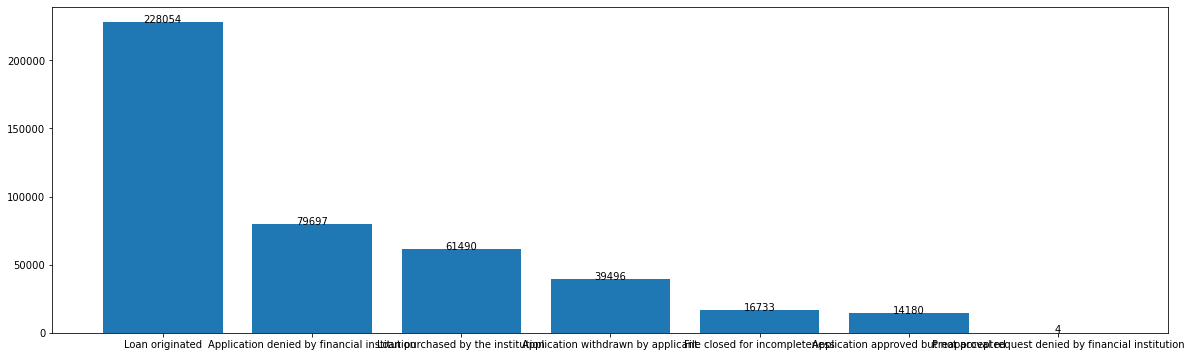

In [22]:
frequency_table_visual(freqt)

We consider binary classification in here, loan originates (1), application denied by financial institution(0).

In [11]:
subdat = dat[(dat["action_taken_name"]=="Loan originated" )| (dat["action_taken_name"]=="Application denied by financial institution")]

In [12]:
feature_cols = ['action_taken_name', 
            'agency_abbr', 
            'applicant_ethnicity_name',
            'applicant_income_000s', 
            'applicant_race_name_1', 
            'applicant_sex_name',
            'hoepa_status_name', 
            'lien_status_name',
            'loan_purpose_name', 
            'loan_type_name', 
            'msamd',
            'owner_occupancy_name', 
            'preapproval_name', 
            'property_type_name',
            'purchaser_type_name', 
            'hud_median_family_income',
            'loan_amount_000s', 
            'number_of_1_to_4_family_units',
            'number_of_owner_occupied_units',
            'tract_to_msamd_income'
]

In [13]:
data = subdat[feature_cols]

## Cross Tables for Categorical features
* agency_abbr
* applicant_ethnicity_name
* applicant_race_name_1
* applicant_sex_name
* hoepa_status_name
* lien_status_name
* loan_purpose_name
* loan_type_name
* owner_occupancy_name
* preapproval_name
* property_type_name
* perchaser_type_name

In [14]:
data["preapproval_name"].value_counts()

Not applicable                   242937
Preapproval was not requested     55452
Preapproval was requested          9362
Name: preapproval_name, dtype: int64

### agency_abbr vs action_taken

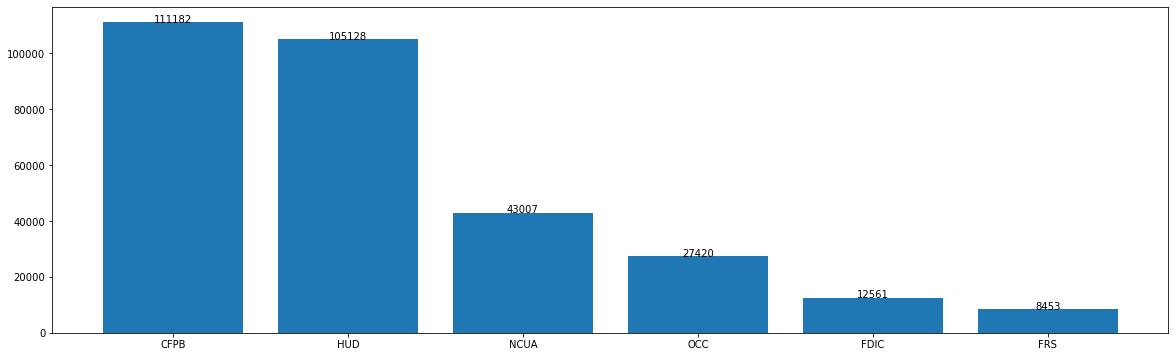

In [23]:
t1 = frequency_table(data["agency_abbr"],"agency_abbr")
frequency_table_visual(t1)

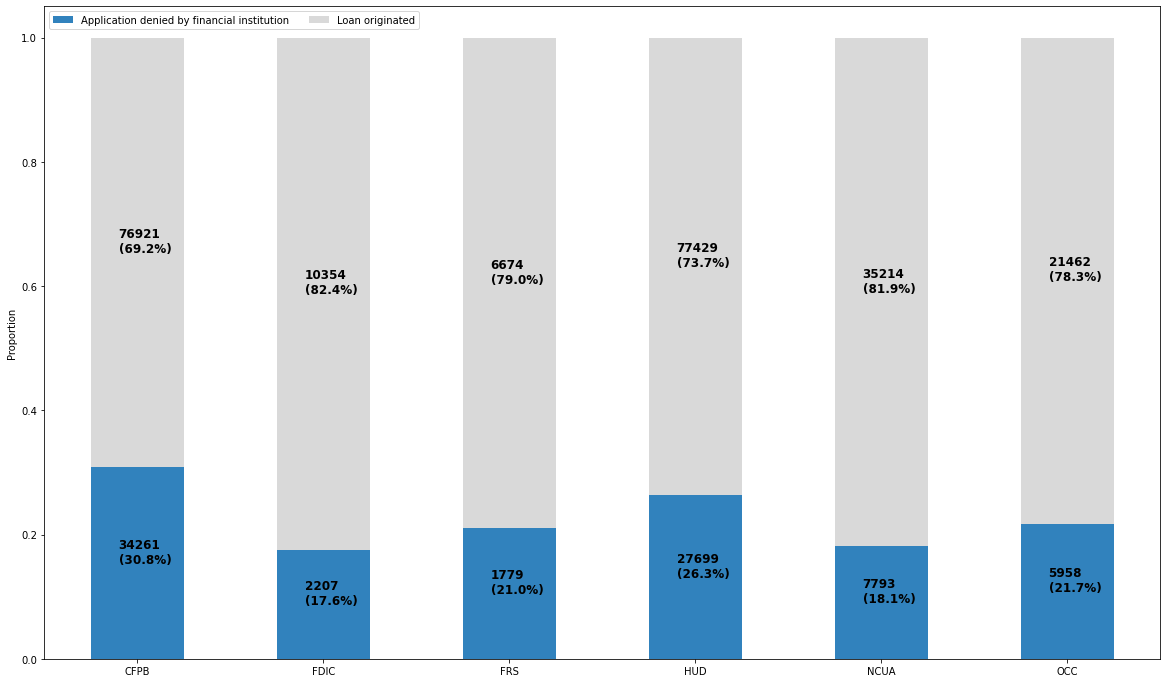

In [24]:
ctp1 = pd.crosstab(index = data["agency_abbr"], 
                   columns = data["action_taken_name"],
                   normalize = "index")
ct1 = pd.crosstab(index = data["agency_abbr"], 
                  columns = data["action_taken_name"])
crosstable_visual(ct1,ctp1)

### applicant_ethnicity_name

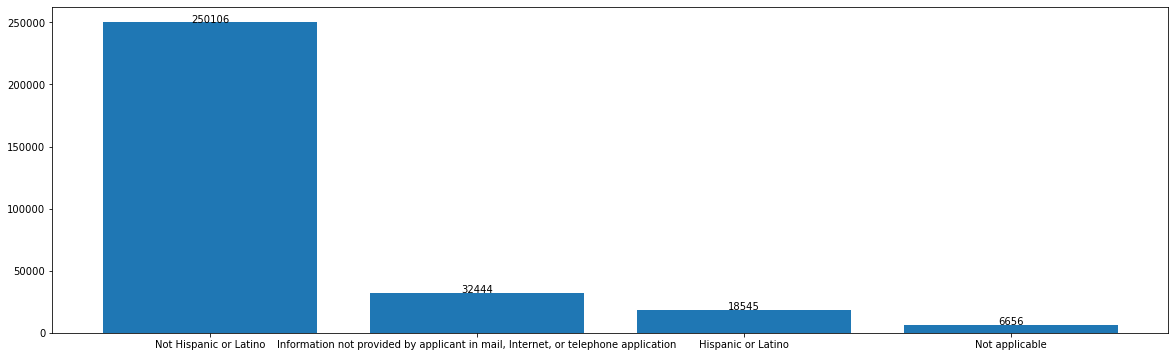

In [25]:
t2 = frequency_table(data["applicant_ethnicity_name"],"applicant_ethnicity_name")
frequency_table_visual(t2)

In [26]:
data["applicant_ethnicity_name"].replace('Information not provided by applicant in mail, Internet, or telephone application', 
                                         np.nan, inplace = True)
data["applicant_ethnicity_name"].replace('Not applicable', 
                                         np.nan, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
data["applicant_ethnicity_name"].unique()

array(['Not Hispanic or Latino', nan, 'Hispanic or Latino'], dtype=object)

In [28]:
ct2 = pd.crosstab(index = data["applicant_ethnicity_name"], columns = data["action_taken_name"])
ctp2 = pd.crosstab(index = data["applicant_ethnicity_name"], columns = data["action_taken_name"], normalize = "index")

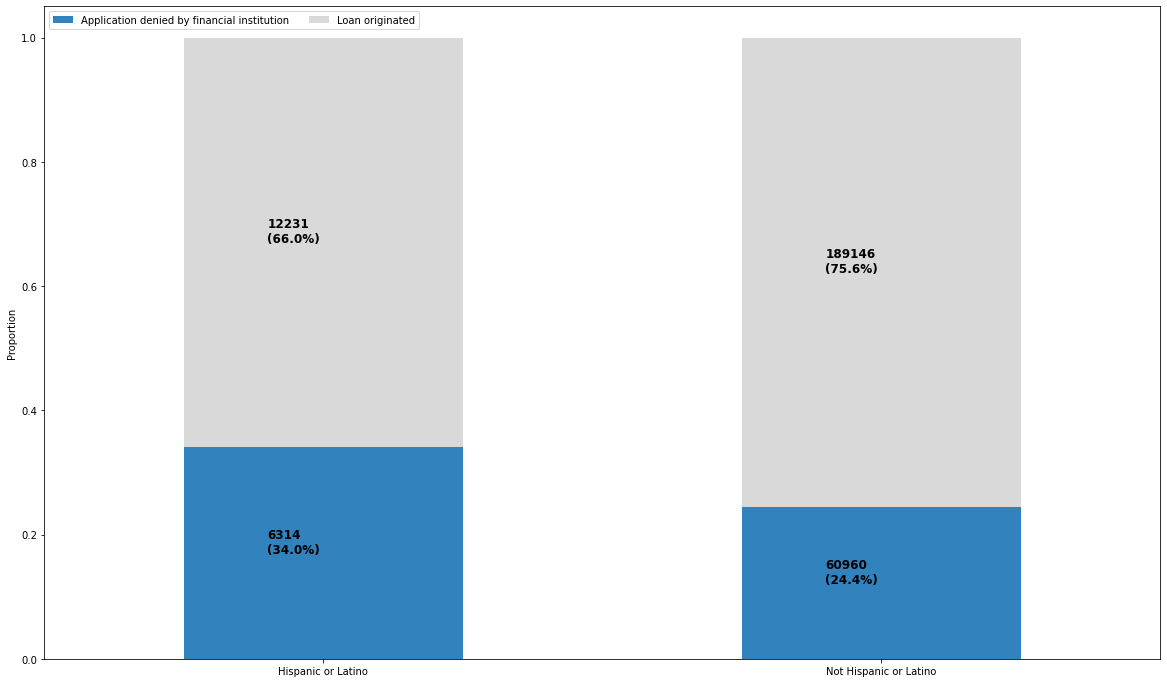

In [29]:
crosstable_visual(ct2,ctp2)

### Numerical Features

In [42]:
data.describe()

,applicant_income_000s,msamd,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,tract_to_msamd_income
count,284496.000000,279938.000000,306941.000000,307751.000000,306550.000000,306655.000000,306868.000000
mean,136.774064,32173.944202,77795.497180,332.463121,1528.615661,1225.912403,118.343329
std,253.020543,9834.853636,16140.612183,1242.702105,793.399343,605.048019,53.169518
min,1.000000,10580.000000,57200.000000,1.000000,6.000000,2.000000,3.670000
25%,57.000000,35004.000000,69000.000000,94.000000,988.000000,765.000000,88.709999
50%,88.000000,35614.000000,71300.000000,197.000000,1541.000000,1207.000000,106.949997
75%,140.000000,35614.000000,82700.000000,359.000000,2021.000000,1647.000000,132.020004
max,9999.000000,48060.000000,109000.000000,99999.000000,6345.000000,6454.000000,367.609985


In [46]:
data = data[data["applicant_income_000s"]<140]
data = data[data["loan_amount_000s"]<350]

In [47]:
data.describe()

,applicant_income_000s,msamd,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,tract_to_msamd_income
count,184770.000000,160985.000000,184109.000000,184770.000000,183949.000000,184004.000000,184077.000000
mean,70.284640,31068.866441,75745.244393,139.272550,1661.629463,1278.873274,107.043560
std,30.255093,11451.974551,15377.688643,93.894449,705.919365,571.687382,33.917399
min,1.000000,10580.000000,57200.000000,1.000000,7.000000,2.000000,3.670000
25%,47.000000,20524.000000,68500.000000,66.000000,1196.000000,859.000000,87.339996
50%,67.000000,35614.000000,69700.000000,125.000000,1656.000000,1251.000000,103.370003
75%,92.000000,40380.000000,82700.000000,206.000000,2103.000000,1669.000000,122.220001
max,139.000000,48060.000000,109000.000000,349.000000,6345.000000,6454.000000,367.609985


In [ ]:

# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

In [31]:
data["action_taken_name"].unique()

array(['Loan originated', 'Application denied by financial institution'],
      dtype=object)

In [ ]:
figsize(10, 8)

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount_000s'>

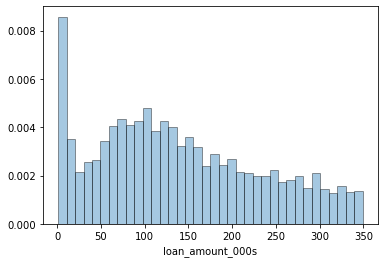

In [48]:
    sns.distplot(data['loan_amount_000s'], bins = int(180/5), 
                 label = "Loan originated", hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})

In [36]:
data['loan_amount_000s'].describe()

count    307751.000000
mean        332.463121
std        1242.702105
min           1.000000
25%          94.000000
50%         197.000000
75%         359.000000
max       99999.000000
Name: loan_amount_000s, dtype: float64

In [ ]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']